# SVM

支持向量机（support vector machines）是一种二分类模型，它不仅可以对线性分类数据集进行分类，还可以对非线性数据集分类。。它的基本模型是定义在特征空间上的间隔最大的线性分类器。**特别是适用于中小型复杂数据集的分类。**  

给定数据集D $$ D = \begin{bmatrix} (x_1,y_1),(x_2,y_2)，\ldots，(x_n,y_n)\ \    \end{bmatrix}$$
其中m为样本个数，$x_i$为第i个样本，$y_i$为$x_i$的标签，正样本时$y_i$=1，负样本是$y_i$ =-1。

**SVM对特征缩放特别敏感**

## 线性可分SVM

### 硬间隔最大化

给定线性可分训练数据集，通过间隔最大化或等价地求解相应的凸二次规划问题学习到的线性可分离超平面为：
$$ w^T\cdot x +b =0 $$

相应的决策函数为 $$ f(x) = sign(w^T\cdot x +b) $$  
称为线性可分支持向量机

其中w为超平面的法向量,b为截距，其中$ sign(x) = \begin{cases} +1 (x \ge0) \\ -1 (x<0) \end{cases} $

#### 函数间隔

对于给定的训练数据集D和超平面(w,b)，定义超平面（w,b）关于样本点$(x_i,y_i)$的函数间隔为$$ \hat{\gamma}_i = y_i(w \cdot x +b) $$  

定义超平面(w,b)关于训练集D的函数间隔为超平面(w,b)关于D中所有样本点$(x_i,y_i)$的函数间隔之最小值，即$$ \hat{\gamma} = min\ \  \hat{\gamma}_i $$  
  
一般来说，一个点距离超平面的远近可以表示分类的确信程度。在超平面(w,b)确定的情况下，$| w\cdot x + b|$能够相对地表示点x距离超平面的远近。而$ w\cdot x + b$的符号与类标记y的符号能够相对地表示分类是否正确，所以可以用量 $| y(w\cdot x + b)|$来表示分类的正确性及确信度，这就是函数间隔的概念。


#### 几何间隔

函数间隔可以表示分类预测的正确性及确信程度。但是选择分离超平面时，只有函数间隔还不够。因为只要成比例的改变w和b，超平面并不会改变，但是函数间隔却会成比例的改变。所以可以对分离超平面的法向量w做些约束，如规范化，$\left\| w \right\| =1$，使得函数间隔是确定的，这时候函数间隔成为几何间隔。

对于给定的训练数据集D和超平面(w,b)，定义超平面（w,b）关于样本点$(x_i,y_i)$的几何间隔为
$$  \gamma_i = y_i (\frac{w}{\left\| w \right\|} \cdot x_i +\frac{b}{\left\| w \right\|})  $$  
定义超平面(w,b)关于训练集D的几何间隔为超平面(w,b)关于D中所有样本点$(x_i,y_i)$的几何间隔之最小值，即$$ \hat{\gamma} = min\ \  \hat{\gamma}_i $$  

函数间隔和几何间隔有以下关系$$ \gamma(几何间隔) = \frac{\hat{\gamma}(函数间隔)}{\left\| w \right\|} $$  
如果 $\left\|w\right\| = 1$那么函数间隔和几何间隔相等。如果超平面参数w和b成比例地改变（超平面不变），函数间隔也按比例改变，而几何间隔不变。

#### 间隔最大化

支持向量机学习的基本想法是求解能够正确划分训练数据集并且几何间隔最大的分离超平面。对线性可分的训练数据集而言，线性可分理超平面有无穷多个，但是几何间隔最大的分离超平面是唯一的。  
间隔最大化的直观解释是：对训练数据集找到几何间隔间隔最大的超平面意味着以充分大的确信度对训练数据进行分类。也就是说，不仅将正负实例分开，而且对最难分的实例点（离超平面最近的点）也有足够大的确信度将他们分开。这样的超平面应该对未知的新实例有很好的分类预测能力。  

**最大间隔分离超平面**  
如何求得一个几何间隔最大的分离超平面，即最大间隔分离超平面，可以表示为下面的这个最优化问题：
$$ \max\limits_{w,b} \gamma  \\  s.t. \ \ \  y_i (\frac{w}{\left\| w \right\|} \cdot x_i +\frac{b}{\left\| w \right\|})\ge \gamma,i=1,2,...,N  $$  
即我们希望最大化超平面(w,b)关于训练数据集的几何间隔γ，约束条件表示的是超平面(w,b)关于每个训练样本点的几何间隔至少是γ。

考虑函数间隔和几何间隔之间的关系式，可将这个问题改写为$$ \max\limits_{w,b} \frac{\gamma}{\left\|w\right\|}  \\  s.t. \ \ \  y_i (w \cdot x_i +b)\ge \gamma,i=1,2,...,N  $$    
函数间隔γ的取值并不影响最优化问题的解。假设将w和b按比例成倍的变为$\lambda w,\lambda b$那么函数间隔将变为$\lambda \hat{\gamma}$。函数间隔的这一改变对上面最优化问题的不等式约束没有影响，对目标函数的优化也没有影响。  
这样，就可以取$\hat{\gamma =1}$。将$\hat{\gamma =1}$带入上面的最优化问题，同时$\frac{1}{\left\|w\right\|}$和最小化$\frac{1}{2}\left\|w\right\|^2$是等价的，于是就得到下面的线性可分支持向量机学习的最优化问题$$ \min\limits_{w,b} \frac{1}{2}\left\|w\right\|^2  \\  s.t. \ \ \  y_i (w \cdot x_i +b)-1\ge 0,i=1,2,...,N  $$ 
这是一个凸二次规划问题。

#### 支持向量和间隔边界

在线性可分的情况下，训练数据集的样本点中与分离超平面距离最近的样本点的实例称为支持向量。支持向量是使上式约束条件等式成立的点，即  
$$ y_i(w\cdot x_i +b) -1=0$$  
对$y_i=+1$的正例点，支持向量在超平面$H_1:w\cdot x+b = 1 $  
对$y_i=-1$的负例点，支持向量在超平面$H_2:w\cdot x+b = -1 $    
$H_1$和$H_2$之间的距离称为间隔。间隔依赖于分离超平面的法向量w，等于$\frac{2}{\left\|w\right\|}$。$H_1$和$H_2$称为间隔边界。

在决定分离超平面时只有支持向量起作用，而其他实例点并不起作用。由于支持向量在确定分离超平面中起着决定性作用，所以将这种分类模型称为支持向量机。支持向量的个数一般很少，所以支持向量机由很少的“重要的”训练样本确定。

#### 对偶问题

在约束优化问题中，可通过拉格朗日对偶将原问题转换为对偶问题，对偶问题的解也即原问题的解。对于如下原始约束问题
$$ \min\limits_{x} f(x) \\ s.t. h_i(x) \leq0,i=1,2,...,k  \\ g_j(x)=0,j=1,2,...,l  $$  
我们可以将其转换为无约束的拉格朗日对偶问题
$$ L(x,\alpha,\beta) = f(x) +\sum_{i=1}^k \alpha_i h_i(x) + \sum_{j=1}^l \beta_i g_i(x) $$  
其中$\alpha_i，\beta_j称为拉格朗日乘子且\alpha_i \ge 0$

对于线性SVM原始问题，我们求其拉格朗日对偶形式过程如下：    
1. 先把$y_i (w \cdot x_i +b)-1\ge 0$取负号，得 $ -y_i (w \cdot x_i +b)+1\leq 0$
然后构造拉格朗日式子：
$$ L(w,b,\alpha)= \frac{1}{2}\left\|w\right\|^2 - \sum_{i=1}^N \alpha_iy_i(w\cdot x_i+b) + \sum_{i=1}^N\alpha_i$$
2. 然后对w，b分别求偏导，得：$$ \frac{\partial L}{\partial w} = w - \sum_{i=1}^{N}\alpha_iy_ix_i \\  \frac{\partial L}{\partial b} =  - \sum_{i=1}^{N}\alpha_iy_i $$
3. 令导数等于0，得到$$ w = \sum_{i=1}^{N}\alpha_iy_ix_i \\ \sum_{i=1}^{N}\alpha_iy_i=0 $$
4. 将$ w = \sum_{i=1}^{N}\alpha_iy_ix_i $带入构造的拉格朗日式子，得到
$$ L(w,b,\alpha) = \frac{1}{2} \sum_{i=1}^N \sum_{j=1}^N \alpha_i\alpha_j y_i y_j(x_i\cdot x_j)  -\sum_{i=1}^N\alpha_iy_i((\sum_{j=1}^{N}\alpha_iy_ix_j) \cdot x_i +b)  +\sum_{i=1}^N\alpha_i $$
5. 化简得：$$ L(w,b,\alpha) = -\frac{1}{2} \sum_{i=1}^N \sum_{j=1}^N \alpha_i\alpha_j y_i y_j(x_i\cdot x_j) + \sum_{i=1}^N\alpha_i$$  
注意：这里的 $x_i \cdot x_j 是一维向量，dot( x_i , x_j)的结果是一个数字$
6. 求$ \min\limits_{w,b} L(w,b,\alpha) $对 α的极大，即是对偶问题 $$ \max\limits_{\alpha}  -\frac{1}{2} \sum_{i=1}^N \sum_{j=1}^N \alpha_i\alpha_j y_i y_j(x_i\cdot x_j) + \sum_{i=1}^N\alpha_i \\ s.t. \sum_{i=1}^N\alpha_iy_i=0 \\ \qquad\qquad\ \ \  \alpha_i \ge0,i=1,2,...,N $$ 
7. 将上式的目标函数取负，即由求极大转换成求极小，就得到了下面与之等价的对偶最优化问题：$$\min\limits_{\alpha}  \frac{1}{2} \sum_{i=1}^N \sum_{j=1}^N \alpha_i\alpha_j y_i y_j(x_i\cdot x_j) - \sum_{i=1}^N\alpha_i \\ s.t. \sum_{i=1}^N\alpha_iy_i=0 \\ \qquad\qquad\ \ \  \alpha_i \ge0,i=1,2,...,N  （支持向量对应的\alpha_i >0 ,非支持向量对应的 \alpha_i = 0 ）   $$  

假设$\alpha^* = (\alpha_1^*,\alpha_2^*,...,\alpha_l^*)$是上式对偶问题的解，则存在下标j,使得 $\alpha_j^* >0$，并可按下式求得原始问题的解$w^*,b^*$ $$ w^* = \sum_{i=1}^N \alpha_iy_ix_i  \\ b = y_j -\sum_{i=1}^N \alpha_i^*y_i(x_i \cdot x_j)$$


w  = np.dot(sv_alpha*sv_y,sv)    
b_tmp  = sv_y - np.dot(w, sv.T)    
b = np.mean(b_tmp) #对b取平均值 

sv_alpha 表示 支持向量对应的alpha  
sv_y 表示支持向量对于的标签  
sv 表示支持向量  


#### KKT条件 

对于原始问题，$ℎ_𝑖(𝑥)≤0$不等式约束$,𝑔_𝑗(𝑥)=0$等式约束，我们得到其拉格朗日对偶形式，由不等式约束和等式约束我们得到如下KKT条件
$$ \begin{cases}
\nabla_x L(x^*,\alpha^*,\beta^*) = 0 \\ 
\alpha_i h_i(x) = 0 ,i=1,2,...,k \\ 
h_i(x) \leq 0 ,i=1,2,...,k \\
\alpha_i \ge 0 ,i=1,2,...,N \\
g_i(x) = 0,i=1,2,...,l
\end{cases} $$  
特别指出，$\alpha_i^* h(x) = 0 $称为KKT的对偶互补条件。由此条件可知，若$\alpha_i^* > 0$,则 $h_i(x^*) =0 $

于是，对偶问题$L(w,b,\alpha)$的KKT条件为$$ 
\begin{cases}
\nabla_w L(w,b,\alpha) = w^* - \sum_{i=1}^N \alpha_i y_i x_i = 0 \\
\nabla_b L(w,b,\alpha) = - \sum_{j=1}^N \alpha_i^*y_i = 0 \\
\alpha_i^*(y_i(w^*\cdot x_i +b) -1) = 0  ,i=1,2,...,N \\
y_i(w^* \cdot x_i +b^*) -1 \ge 0 ,i=1,2,...,N \\
\alpha_i^* \ge 0,i=1,2,...,N
\end{cases}
$$  
即由KKT互补条件可知， 当$\alpha_i^* > 0$时，$y_i(w^*\cdot x_i +b) -1 = 0$ ，此时$x_i$为支持向量

## 线性不可分SVM

#### 软间隔最大化

线性可分的支持向量机学习方法，对线性不可分训练数据时不适用的，因为这是上诉方法中的部的不等式约束并都能成立。为了扩展到线性不可分问题，这是就需要修改硬间隔最大化，使其成为软间隔最大化。  
线性不可分意味着某些样本点不能满足函数间隔大于等于1的约束条件。为了解决这个问题，可以对每个样本点引进一个松弛变量 $\xi \ge 0$，使函数间隔加上松弛变量大于等于1。这样约束条件变为$$ y_i(w \cdot x +b)>= 1-\xi_i $$  
同时对每个松弛变量 $\xi_i$，支付一个代价 $\xi_i$。目标函数变成$$\frac{1}{2}\left\|w\right\|^2 +C\sum_{i=1}^N \xi_i $$  
这里的C>0称为惩罚参数，C值大时对吴分类的惩罚增大，C值小时对误分类的惩罚减小。最小化上式目标函数有两层含义：使$\frac{1}{2}\left\|w\right\|^2$尽量小即间隔尽量大，同时使误分类的个数尽量少，C是调和二者的系数。

线性不可分支持向量机的原始问题$$ \min\limits_{w,b} \frac{1}{2}\left\|w\right\|^2 + C\sum_{i=1}^N \xi_i \\  s.t. \ \ \  y_i (w \cdot x_i +b)\ge1- \xi_i,i=1,2,...,N  \\ \xi_i \ge0,i=1,2,...,N $$ 

构造对偶问题：
1. 构造拉格朗日函数  $$L(w,b,\xi,\alpha,\mu) = \frac{1}{2}\left\|w\right\|^2  + C\sum_{i=1}^N\xi_i + \sum_{i=1}^N \alpha_i(-y_i(w \cdot x +b) +1-\xi_i) + \sum_{i=1}^N \mu_i(-\xi_i) $$
即 $$L(w,b,\xi,\alpha,\mu) = \frac{1}{2}\left\|w\right\|^2 + C\sum_{i=1}^N \xi_i- \sum_{i=1}^N \alpha_i(y_i(w \cdot x +b) -1+\xi_i) - \sum_{i=1}^N \mu_i(\xi_i)  $$
2. 对w,b,$\xi$求偏导 $$ \frac{\partial L}{\partial w} = w - \sum_{i=1}^{N}\alpha_iy_ix_i \\  \frac{\partial L}{\partial b} =  - \sum_{i=1}^{N}\alpha_iy_i  \\ \frac{\partial L}{\partial \xi_i} = C-\alpha_i -\mu_i$$
3. 令导数等于0，得 $$ w = \sum_{i=1}^{N}\alpha_iy_ix_i \\ \sum_{i=1}^{N}\alpha_iy_i=0 \\ C - \alpha_i - \mu_i = 0$$
4. 代入L中，得到$$ L(w,b,\xi,\alpha,\mu) = \frac{1}{2}\sum_{i=1}^N \alpha_iy_ix_i\sum_{j=1}^N\alpha_jy_jx_j  + C\sum_{i=1}^N\xi_i -\sum_{i=1}^N \alpha_i(y_i((\sum_{j=1}^N \alpha_jy_jx_j)x_i+b)-1+\xi_i) - \sum_{i=1}^N\mu_i\xi_i$$
5. 化简得：$$ L(w,b,\alpha) = -\frac{1}{2} \sum_{i=1}^N \sum_{j=1}^N \alpha_i\alpha_j y_i y_j(x_i\cdot x_j) + \sum_{i=1}^N\alpha_i$$  
注意：这里的 $x_i \cdot x_j 是dot( x_i^T , x_j)$
6. 求$ \min\limits_{w,b} L(w,b,\xi,\alpha,\beta) $对 α的极大，即是对偶问题 $$ \max\limits_{\alpha,w,\xi}  -\frac{1}{2} \sum_{i=1}^N \sum_{j=1}^N \alpha_i\alpha_j y_i y_j(x_i\cdot x_j) + \sum_{i=1}^N\alpha_i \\ s.t. \sum_{i=1}^N\alpha_iy_i=0 \\ \qquad\qquad\ \ \  \alpha_i \ge0,i=1,2,...,N  \\   \quad\quad C-\alpha_i - \mu_i = 0 ,i=1,2,...,N \\ \mu_i \ge ,i=1,2,...,N0$$ 
7. 将上式的目标函数取负，即由求极大转换成求极小，就得到了下面与之等价的对偶最优化问题：$$\min\limits_{\alpha}  \frac{1}{2} \sum_{i=1}^N \sum_{j=1}^N \alpha_i\alpha_j y_i y_j(x_i\cdot x_j) - \sum_{i=1}^N\alpha_i \\ \\ s.t. \sum_{i=1}^N\alpha_iy_i=0 \\ \qquad\qquad\ \ \ 0\leq \alpha_i \leq C ,i=1,2,...,N  \\ $$  

假设$\alpha^* = (\alpha_1^*,\alpha_2^*,...,\alpha_l^*)$是上式对偶问题的解，则存在下标j,使得 $\alpha_j^* >0$，并可按下式求得原始问题的解$w^*,b^*$ $$ w^* = \sum_{i=1}^N \alpha_i^*y_ix_i  \\ b = y_j -\sum_{i=1}^N \alpha_i^*y_i(x_i \cdot x_j)$$

对偶问题$L(w,b,\xi,\alpha,\beta)$的KKT条件为$$ 
\begin{cases}
\nabla_w L(w,b,\xi,\alpha,\beta) = w^* - \sum_{i=1}^N \alpha_i y_i x_i = 0 \\
\nabla_b L(w,b,\xi,\alpha,\beta) = - \sum_{j=1}^N \alpha_i^*y_i = 0 \\
\nabla_\xi L(w,b,\xi,\alpha,\beta) = C-\alpha^* -\mu^* =0\\
\alpha_i^*(y_i(w^*\cdot x_i +b) -1 +\xi_i^*) = 0  ,i=1,2,...,N \\
\mu_i\xi_i^*=0 \\
y_i(w^* \cdot x_i +b^*) -1 +\xi_i^*\ge 0 ,i=1,2,...,N \\
 0 \leq \alpha_i^* \leq C,i=1,2,...,N \\
\xi_i^* \ge 0 \\
\mu_i^* \ge 0 \\
\end{cases}
$$  
当 0< $\alpha_i^* <C $时，$y_i(w^*\cdot x_i +b) -1 = 0$ ，此时$x_i$为支持向量，刚好在间隔边界上。

### SMO 

SMO（序列最小最优化算法）是高效求解SVM算法参数的优化算法。SMO算法的求解过程是不断的将原问题分解为子问题，子问题全都求解完成时原问题也就求解完成。 

子问题的求解方法是选择两个变量，固定其他变量，针对两个变量构建一个二次规划问题，求解这个二次规划问题的解的目标是要保证能够使原问题数值下降。子问题的这两个变量，一个是违反KKT条件最严重的，另一个是有约束条件$\sum_{i=1}^N \alpha_i y_i = 0$确定。

假设$\alpha_1,\alpha_2$为变量，$\alpha_3,\alpha_4,...,\alpha_n$固定（$\alpha$的个数等于样本的个数）,则有$$ \alpha_1y_1 + \alpha_2y_2 = -\sum_{i=1}^N \alpha_iy_i $$  
$y_1,y_2 \in  \{ +1,-1 \}$，如果$\alpha_2$确定了,那么$\alpha_1$也就确定了。

#### 两个变量二次规划的求解方法

假设$\alpha_1,\alpha_2$为变量，𝛼3,𝛼4,...,𝛼𝑛 固定，则最优化问题的子问题可以写成
$$ \min\limits_{\alpha_1,\alpha_2} \qquad W(\alpha_1,\alpha_2) = \frac{1}{2}K_{11}\alpha_1^2 + \frac{1}{2}K_{22}\alpha_2^2  + y_1 y_2K_{12}\alpha_1\alpha_2 -(\alpha_1+\alpha_2) + y_1\alpha_1 \sum_{i=1}^N y_i \alpha_i K_{i1} +y_2 \alpha_2 \sum_{i=3}^Ny_i\alpha_iK_{i2} \\ s.t. \quad \alpha_1 y_1 + \alpha_2 y_2 = - \sum_{i=3}^N y_i \alpha_i  \\ 0 \leq \alpha_i \leq C,i=1,2$$  
其中，$K_{ij} = Kernel(x_i,x_j)$,式中省略了不含 $\alpha_1,\alpha_2$ 的常数项。

假设问题的初始可行解为 $\alpha_1^{old},\alpha_2^{old}$，最优解为$\alpha_1^{new},\alpha_2^{new}$，由于$\alpha_2$需要满足不等式约束0≤𝛼𝑖≤𝐶，所以最优值$\alpha_2$的取值范围必须满足条件 $$ L \leq \alpha_2^{new} \leq H $$  
其中 ,如果$y_1 \ne y_2$$ L = max(0,\alpha_2^{old} - \alpha_1^{old}) \qquad H = min(C,C+\alpha_2^{old} - \alpha_1^{old})$  
如果$y_1 = y_2$$ L = max(0,\alpha_1^{old} + \alpha_2^{old} -C) \qquad H = min(C,\alpha_2^{old} + \alpha_1^{old})$

假设 $ \alpha_2$未经取值范围[L,H]裁剪的最优解为$\alpha_2^{new,unc} $令 
$$ g(x) = \sum_{i=1}^{N}\alpha_i y_i K(x_i,x) +b \\ E_i = g(x_i) -y_i = (\sum_{j=1}^{N}\alpha_i y_i K(x_i,x_j) +b) -y_i ,i=1,2$$  
$E_i$表示预测值和真实值之差  

这个最优化问题未经剪辑的解是$$ \alpha_2^{new,unc} = \alpha_2^{old} + \frac{y_2(E_1-E_2)}{\eta} $$
其中 $\eta = K_{11} + K_{22} - 2K_{12}$

经过剪辑后的$\alpha_2$的解是$$ 
\alpha_2^{new} = 
\begin{cases}
H,\qquad alpha_2^{new,unc}>H \\
\alpha_2^{new,unc}, \qquad L \leq alpha_2^{new,unc} \leq H \\
L,\qquad alpha_2^{new,unc} <L
\end{cases}
$$

由 $\alpha_2^{new}$ 求得 $ \alpha_1^{new} $ 是
$$  \alpha_1^{new} = \alpha_1^{old} + y_1y_2( \alpha_2^{old} -\alpha_2^{new} ) $$

#### 两个变量的选择

**选择第一个变量**  
第一个变量选择的过程也会称为外层循环，外层循环在训练样本中选取违反KKT条件最严重的样本，并将其相应的变量作为第一个变量。具体的训练样本($x_i,y_i$)是否满足KKT条件
$$ a_i = 0 \Leftrightarrow  y_ig(x_i) \ge 1 \\
0 < \alpha_i < c \Leftrightarrow y_ig(x_i) = 1 \\
\alpha_i = C \Leftrightarrow y_ig(x_i) \leq 1
$$  
其中$ g(x_i) = \sum_{j=1}^N \alpha_j y_j(x_i \cdot x_j) +b $ 

在检验过程中，外层循环先遍历所有满足条件 0< $\alpha+i$ <C的样本，即在边界上的支持向量，检验他们是否满足KKT条件。如果这些样本都满足KKT条件则遍历整个训练集，检验他们是否满足KKT条件。

In [ ]:
 def _smo_outer(self,y):
        num_epoch = 0 #记录迭代次数
        #是否遍历整个训练集
        traverse_trainset = True #初始遍历还没有选择支持向量，所以是遍历整个训练集
        #表示aplha是否进行了更新
        alpha_change = 0

        while alpha_change >0 or traverse_trainset:
            alpha_change = 0
            if traverse_trainset:
                for i in range(self._n_samples): #_n_samples 是样本数量
                    alpha_change +=self._smo_inner(i,y)  #选第二个变量，返回的是0或者1 ，0代表 α_i 没有违反KKT或者 α_j
                                                        # 不能产生足够大的变化  
            else:
                #获取间隔边界上支持向量的索引，即0 < aplha < C对应的支持向量索引
                bound_sv_idx = np.nonzero(np.logical_and(self._alpha>0,self._alpha< self._C))[0]
                for i in bound_sv_idx:
                        alpha_change +=self._smo_inner(i,y) #选第二个变量
            num_epoch += 1
            if num_epoch >self._n_epoch: #_n_sepoch 是设置的最大的迭代次数
                break;
            if traverse_trainset:
                #如果这一轮遍历了整个训练集，下一轮遍历间隔边界上的支持向量
                traverse_trainset = False
            elif alpha_change == 0:
                 # 如果在间隔边界上未能优化这两个变量(未找到合适的alpha)，则遍历整个训练集重新选择变量
                traverse_trainset = True

**选第二个变量**  
第二个变量的选择过程也称为内层循环。假设外层循环已经找到了第一个变量$\alpha_1$，我们在内层循环中需要知道第二个变量$\alpha_2$，第二个变量的选择依据是期望$\alpha_2$有足够大的变化。

$ \alpha_2^{new}$ 是依赖于$| E_1 - E_2| $的，为了加快计算速度，一种简单的做法是选择$\alpha_2$，使其对应的$|E_1 -E_2|$最大。因为 $\alpha_1$已定，$E_1$也是确定了。如果$E_1$是正的，那么选择最小的$E_i$作为$E_2$，如果$E_1$是负的，那么选择最大的$E_i$作为$E_2$。为了节省计算时间，将所有的$E_i$值保存在一个列表中。  

在特殊的情况下，如果内层循环通过以上的方法选择$\alpha_2$不能使目标函数有足够的下降，那么采用以下启发式规则继续选择$\alpha_2$。遍历在间隔边界上的支持向量点，依次将其对应的变量作为$\alpha_2$试用，直到目标函数有足够的下降。若找不到合适的$\alpha_2$，那么遍历训练数据集；若仍找不到合适的$\alpha_2$，则放弃第一个$\alpha_1$，再通过外层循环求另外的$\alpha_1$。

In [ ]:
def _smo_inner(self,i,y):
        # i是选择的第一个变量的索引

        #检验 向量i是否满足KKT条件，不满足时返回true
        if(self._violate_kkt(i,y)):
            Ei = self._g(i,y)-y[i] 
            j,Ej = self._select_second_j(i,y) #选择第二个变量，并返回第二个变量的Ej

            alpha_i_old = self._alpha[i].copy()
            alpha_j_old = self._alpha[j].copy()

            if y[i] != y[j]:
                 # y[i]与y[j]异号
                L = max(0,self._alpha[j] - self._alpha[i])
                H = min(self._C,self._C+self._alpha[j] - self._alpha[i])
            else:
                # y[i]与y[j]同号
                L = max(0,self._alpha[j]+self._alpha[i]-self._C)
                H = min(self._C,self._alpha[j]+self._alpha[i])

            if L==H:
                return 0

            eta = self._K[i,i]+self._K[j,j] - 2*self._K[i,j]
            # eta表达式本身是完全平方，且eta作为分母不能等于0，所以必须大于0
            if eta <=0:
                return 0

            #更新并裁剪第二个变量
            self._alpha[j] +=y[j]*(Ei-Ej)/eta
            self._alpha[j] = np.clip(self._alpha[j],L,H)
            
            #第二个变量选择的标准是更新后能够使自身有足够大的变化
            if abs(self._alpha[j] - alpha_j_old)<0.00001:
                return 0

            #更新第一个变量
            self._alpha[i] += y[i]*y[j]*(alpha_j_old-self._alpha[j])

            b1_new = self._b -Ei -y[i]*self._K[i,i]*(self._alpha[i]-alpha_i_old) - y[j]*self._K[j,i]*(self._alpha[j]-alpha_j_old)
            b2_new = self._b -Ej -y[i]*self._K[i,j]*(self._alpha[i]-alpha_i_old) - y[j]*self._K[j,j]*(self._alpha[j]-alpha_j_old)

            if self._alpha[i] >0 and self._alpha[i]<self._C:
                self._b = b1_new
            elif self._alpha[j]>0 and self._alpha[j] < self._C:
                self._b = b2_new
            else:
                self._b = (b1_new+b2_new)/2
            
            #得到了b_new 之后要更新 E_i，E_j
            self._updateE(j,y)
            self._updateE(i,y)
            return  1
        else:
            return 0

def _violate_kkt(self,i,y):
        """
        在选择第一个变量时我们选择违反KKT条件的样本所对应的变量，且在epsilon范围内检验
        外层循环先遍历间隔边界上的支持向量，并检验这些间隔边界上的支持向量是否满足KKT条件，
        如果全都满足KKT条件，再去遍历整个训练集检验
        间隔边界上的支持向量对应于 0 < alpha < C
        i:
            待检验样本的索引
        y:
            训练集标签
        """
        #当 0< alpha[i] <C时属于满足了KKT条件
        if self._alpha[i] > 0 and self._alpha[i] <self._C:
            return abs(y[i]*self._g(i,y)-1) > self._epsilon #在epsilon范围内检验
        #返回true，表示的违反了KKT条件
        return True

def _select_second_j(self,i,y):
        #选了第一个变量之后选择第二个变量，选择使|Ei - Ej|最大的变量
        Ei = self._calc_E(i,y)
        self._Ecache[i] = [1,Ei]

        #保存最大的|Ei - Ej|
        max_diff = -np.inf

        max_j = -1
        max_Ej = -np.inf

        ecache_idx = np.nonzero(self._Ecache[:,0])[0]
        if len(ecache_idx)>1:
            for j in ecache_idx:
                if j == i:
                    continue
                Ej = self._calc_E(j,y)
                diff = abs(Ei-Ej)
                if diff > max_diff:
                    max_diff = diff
                    max_j = j
                    max_Ej = Ej
            return max_j,max_Ej
        else:
            #随机选择
            j = random.randint(0,self._n_samples-1)
            while j==i:
                j = random.randint(0,self._n_samples-1)
            Ej = self._calc_E(j,y)
            return j,Ej
        
def _updateE(self,i,y):
        Ei = self._calc_E(i,y)
        self._Ecache[i] = [1,Ei]

def _calc_E(self,i,y):
        return self._g(i,y)-y[i]
    
def _g(self,i,y):
        #计算第i个样本的预测值
        return  np.dot(self._alpha*y,self._K[i])+self._b

#### 计算阈值b和差值$E_i$

在每次完成两个变量的优化后，都要重新计算阈值b。当$ 0 <  \alpha_1^{new}<C $时，由KKT条件可知$$ \sum_{i=1}^N\alpha_i y_i K_{i1} + b =y_1 $$   
于是 $$ b_1^{new} = y_1 - \sum_{i=3}\alpha_i y_i K_{i1} - \alpha_1^{new} y_1 K_{11} -\alpha_2^{new}y_2K_{21}  $$  

由$E_1$的定义有$$ E_1 = \sum_{i=3}^N \alpha_i y_i K_{i1} + \alpha_1^{old}y_1K_{11} +\alpha_2^{old} y_2 K_{21} +b^{old} -y_1  $$  

而 $y_1 - \sum_{i=3}^N\alpha_i y_i K_{i1}$ 可以写成 $$ y_1 - \sum_{i=3}\alpha_i y_i K_{i1} = -E_1 + \alpha_1^{old} y_1 K_{11} +\alpha_2^{old}y_2K_{21} +b^{old}  $$  

代入$b_1^{new}$式子里，可得$$b_1^{new} = -E_1 - y_1K_{12}(\alpha_1^{new}-\alpha_1^{old}) - y_2K_{22}(\alpha_2^{new}-\alpha_2^{old}) + b^{old} $$  

同样，如果 $ 0< \alpha_2^{new} < C $，那么b_2^{new} = -E_2 - y_1K_{12}(\alpha_1^{new}-\alpha_1^{old}) - y_2K_{22}(\alpha_2^{new}-\alpha_2^{old}) + b^{old} $$ 
如果$\alpha_1^{new},\alpha_2^{new}$同时满足条件$ 0< \alpha_i^{new} < C ,i=1,2$，那么$b_1^{new} = b_2^{new}$。如果$\alpha_1^{new},\alpha_2^{new}$ 是0或者C，那么$b_1^{new} = b_2^{new}$以及它们之间的数都是符合KKT条件的阈值，这是选中它们的中点作为$b^{new}$。  

在每次完成两个变量的优化之后，还必须更新对应的$E_i$值，并将它们保存在列表中。$E_i$的更新要用到$b^{new}$值，以及所有支持向量对应的$\alpha_j$:
$$ E_i^{new} = \sum_{S}y_i\alpha_iK(x_i,x_j) + b^{new} - y_i $$  
其中，S是所有支持向量$x_j$的集合。

### 常用核函数

线性核函数$$ K(a,b) = a^T \cdot b $$  

多项式核函数$$ K(a,b) = (\gamma a^T \cdot b + r)^d $$  

高斯RBF核函数$$ exp(- \gamma \left\| a -b \right\|^2) $$

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import  make_blobs
from sklearn.model_selection import train_test_split

np.set_printoptions(suppress=True)

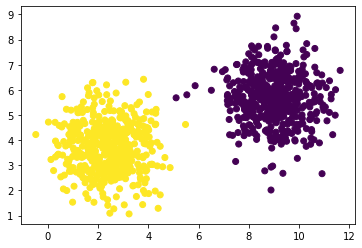

((1000, 2), (1000,))

In [3]:
x_samples,y_true = make_blobs(centers=2,n_samples=1000)
plt.scatter(x_samples[:,0],x_samples[:,1],c=y_true)
plt.show()
x_samples.shape,y_true.shape

In [4]:
#这个数的标签是1和0，把0改为-1
for i in range(len(y_true)):
    if y_true[i] ==0:
        y_true[i] = -1

X_train, X_test, y_train, y_test = train_test_split(x_samples, y_true)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((750, 2), (250, 2), (750,), (250,))

In [60]:
import random

class MySVM():

    def __init__(self,C=1.0,kernel='linear',max_epoch = 3000,espilon = 0.001,degree = 2,gamma=None):
        self._C = C
        self._kernel = kernel
        self._n_epoch = max_epoch
        self._epsilon = espilon
        self._degree = degree #选择多项式核的时候的次数
        self._r = 1 #多项式核的偏值值
        self._gamma = gamma

    def _init_params(self,X,y):
        self._n_samples,self._n_fearture = X.shape
        self._alpha = np.zeros(self._n_samples)
        self._X = X
        self._y = y
        #参数b
        self._b = 0
        #缓存预测值和真实值之间的误差，
        # 第一列标识是否已经更新，0未更新，1已更新
        #第二列表示具体误差值
        self._Ecache = np.zeros((self._n_samples,2))
        #对原始数据做kernel映射后的样本数据
        self._K = np.zeros((self._n_samples,self._n_samples))
        for i in range(self._n_samples):
            for j in range(self._n_samples):
                 self._K[i,j] = self._kernel_trasfrom(X[i],X[j])

    def _kernel_trasfrom(self,xi,xj):
        if self._gamma  is None:
            gamma = 1/self._n_fearture
        else:
            gamma = self._gamma
        #先线性＆函数
        if self._kernel == 'linear':
            return np.dot(xi.T,xj)
        #多项式核函数
        elif self._kernel == 'poly':
            #print(pow(gamma * np.dot(xi,xj) + 1,self._degree))
            #print(xi.shape,xj.shape)
            return pow(gamma * np.dot(xi.T,xj) + self._r,self._degree)
        #m默认使用高斯RBF核函数
        else:
            return np.exp(- gamma * pow(np.linalg.norm(xi-xj,ord=2),2) )


    def _smo_outer(self,y):
        num_epoch = 0
        #是否遍历整个训练集
        traverse_trainset = True
        #表示aplha是否进行了更新
        alpha_change = 0

        while alpha_change >0 or traverse_trainset:
            alpha_change = 0
            if traverse_trainset:
                for i in range(self._n_samples):
                    alpha_change +=self._smo_inner(i,y)
            else:
                #获取间隔边界上支持向量的索引，即0 < aplha <C对应的支持向量索引
                bound_sv_idx = np.nonzero(np.logical_and(self._alpha>0,self._alpha< self._C))[0]
                for i in bound_sv_idx:
                    alpha_change +=self._smo_inner(i,y)
            num_epoch += 1
            if num_epoch >self._n_epoch:
                break;
            if traverse_trainset:
                #如果这一轮遍历了整个训练家，下一轮遍历支持边界上的支持向量
                traverse_trainset = False
            elif alpha_change == 0:
                 # 如果在间隔边界上未能优化这两个变量(未找到合适的alpha)，则遍历整个训练集重新选择变量
                traverse_trainset = True
        print("实际迭代的次数：",num_epoch)

    def _smo_inner(self,i,y):
        # i是第一个变量的索引

        if(self._violate_kkt(i,y)):
            Ei = self._g(i,y)-y[i]
            j,Ej = self._select_second_j(i,y)

            alpha_i_old = self._alpha[i].copy()
            alpha_j_old = self._alpha[j].copy()

            if y[i] != y[j]:
                 # y[i]与y[j]异号
                L = max(0,self._alpha[j] - self._alpha[i])
                H = min(self._C,self._C+self._alpha[j] - self._alpha[i])
            else:
                # y[i]与y[j]同号
                L = max(0,self._alpha[j]+self._alpha[i]-self._C)
                H = min(self._C,self._alpha[j]+self._alpha[i])

            if L==H:
                return 0

            eta = self._K[i,i]+self._K[j,j] - 2*self._K[i,j]
            # eta表达式本身是完全平方，且eta作为分母不能等于0，所以必须大于0
            if eta <=0:
                return 0

            #更新并裁剪第二个变量
            self._alpha[j] +=y[j]*(Ei-Ej)/eta
            self._alpha[j] = np.clip(self._alpha[j],L,H)
            #第二个变量选择的标准是更新后能够使自身有足够大的变化
            if abs(self._alpha[j] - alpha_j_old)<0.00001:
                return 0

            #更新第一个变量
            self._alpha[i] += y[i]*y[j]*(alpha_j_old-self._alpha[j])

            b1_new = self._b -Ei -y[i]*self._K[i,i]*(self._alpha[i]-alpha_i_old) - y[j]*self._K[j,i]*(self._alpha[j]-alpha_j_old)
            b2_new = self._b -Ej -y[i]*self._K[i,j]*(self._alpha[i]-alpha_i_old) - y[j]*self._K[j,j]*(self._alpha[j]-alpha_j_old)

            if self._alpha[i] >0 and self._alpha[i]<self._C:
                self._b = b1_new
            elif self._alpha[j]>0 and self._alpha[j] < self._C:
                self._b = b2_new
            else:
                self._b = (b1_new+b2_new)/2
            #得到了b_new 之后要更新 E_i，E_j
            self._updateE(j,y)
            self._updateE(i,y)
            return  1
        else:
            return 0


    def _violate_kkt(self,i,y):
        """
        在选择第一个变量时我们选择违反KKT条件的样本所对应的变量，且在epsilon范围内检验
        外层循环先遍历间隔边界上的支持向量，并检验这些间隔边界上的支持向量是否满足KKT条件，
        如果全都满足KKT条件，再去遍历整个训练集检验
        间隔边界上的支持向量对应于 0 < alpha < C
        i:
            待检验样本的索引
        y:
            训练集标签
        """
        #当 0< alpha[i] <C时属于满足了KKT条件
        if self._alpha[i] > 0 and self._alpha[i] <self._C:
            return abs(y[i]*self._g(i,y)-1) > self._epsilon
        #返回true，表示的违反了KKT条件
        return True
        # y_g = self._g(i,y) * self._y[i]
        # if self._alpha[i] == 0:
        #     return y_g >= 1
        # elif 0 < self._alpha[i] < self._C:
        #     return y_g == 1
        # else:
        #     return y_g <= 1

    def _g(self,i,y):
        #计算第i个样本的预测值
        return  np.dot(self._alpha*y,self._K[i])+self._b

    def _select_second_j(self,i,y):
        #选了第一个变量之后选择第二个变量，选择使|Ei - Ej|最大的变量
        Ei = self._calc_E(i,y)
        self._Ecache[i] = [1,Ei]

        #保存最大的|Ei - Ej|
        max_diff = -np.inf

        max_j = -1
        max_Ej = -np.inf

        ecache_idx = np.nonzero(self._Ecache[:,0])[0]
        if len(ecache_idx)>1:
            for j in ecache_idx:
                if j == i:
                    continue
                Ej = self._calc_E(j,y)
                diff = abs(Ei-Ej)
                if diff > max_diff:
                    max_diff = diff
                    max_j = j
                    max_Ej = Ej
            return max_j,max_Ej
        else:
            #随机选择
            j = random.randint(0,self._n_samples-1)
            while j==i:
                j = random.randint(0,self._n_samples-1)
            Ej = self._calc_E(j,y)
            return j,Ej


    def _calc_E(self,i,y):
        return self._g(i,y)-y[i]

    def _updateE(self,i,y):
        Ei = self._calc_E(i,y)
        self._Ecache[i] = [1,Ei]


    def fit(self,X,y):

        #进行特征缩放
        # X_max = np.max(X,axis=0)
        # X_min = np.min(X,axis=0)
        # X_new = np.zeros((len(X),len(X[0])))
        # for i in range(len(X)):
        #     for j in range(len(X[0])):
        #         X_new[i,j] = (X_new[i,j]-X_min[j])/X_max[j]

        #初始化参数：样本数，特征值数，参数初始化，核函数映射
        self._init_params(X,y)

        #通过smo算法求解
        self._smo_outer(y)

        #支持向量的索引
        self._sv_idx = np.squeeze(np.argwhere(self._alpha >0))
        #支持向量
        self._sv = X[self._sv_idx]
        #支持向量的标签
        self._sv_y = y[self._sv_idx]
        #支持向量对应的alpha
        self._sv_alpha = self._alpha[self._sv_idx]

        #计算w，b
        self._calc_w_b()

    def _calc_w_b(self):
         self._w  = np.dot(self._sv_alpha*self._sv_y,self._sv)
         #b_tmp = self._sv_y - np.dot(self._w, self._sv.T)
         # self._b =  np.mean(b_tmp)
         # self._b = self._b/np.linalg.norm(self._w,ord=2)
         # self._w = self._w/np.linalg.norm(self._w,ord=2)
         #print(np.linalg.norm(self._w,ord=2))
         # print(self._w.shape)#(2,)
         # print(self._w.T.shape)#(2,)
         # print(self._sv.shape)#(56, 2)


    def predict(self,x):

        #线性方程时可以这样子使用，非线性是不能这样子
        y_predict =  np.dot(x,self._w.T)+self._b

        predict = np.zeros(len(x))
        for j in range(len(x)):
            for i in range(len(self._sv)):
                predict[j] += self._sv_alpha[i] * self._sv_y[i] * self._kernel_trasfrom(x[j], self._sv[i])
            predict[j] += self._b
        #print(predict)
        return np.sign(predict)


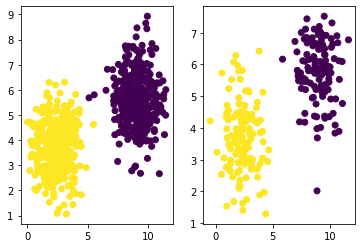

In [6]:
#训练数据分布
plt.subplot(1,2,1)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)

#测试数据分布
plt.subplot(1,2,2)
plt.scatter(X_test[:,0],X_test[:,1],c=y_test)
plt.show()

实际迭代的次数： 3
使用自己写的svm： 100.0 %
支持向量的数量： (6,)


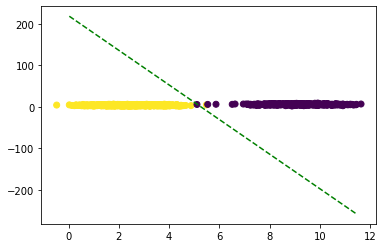

In [64]:
#使用自己写的svm进行测试
C = 0.05
kernel='linear'
mysvm = MySVM(C=C,max_epoch=10000,kernel=kernel,espilon = 0.001)
mysvm.fit(X_train,y_train)
p = mysvm.predict(X_test)
print("使用自己写的svm：",np.sum(p == y_test)/len(y_test)*100,"%")
print("支持向量的数量：",mysvm._sv_alpha.shape)

#画出决策边界
def decision_boundary(kernel ,mysvm):
    if kernel == 'linear':
        w = mysvm._w
        b = mysvm._b
        xp = np.linspace(np.min(X_train[:, 0]), np.max(X_train[:, 0]),200)
        yp = -(w[0] * xp + b) / w[1]
        plt.plot(xp, yp, 'g--')
    else:
        x_1 = np.transpose(np.linspace(np.min(x_samples[:, 0]), np.max(x_samples[:, 0]), 200).reshape(1, -1))
        x_2 = np.transpose(np.linspace(np.min(x_samples[:, 1]), np.max(x_samples[:, 1]), 200).reshape(1, -1))
        X1, X2 = np.meshgrid(x_1, x_2)
        vals = np.zeros(X1.shape)
        for i in range(X1.shape[1]):
            this_X = np.hstack((X1[:, i].reshape(-1, 1), X2[:, i].reshape(-1, 1)))
            vals[:,i] = mysvm.predict(this_X)

        plt.contour(X1, X2, vals, [0, 1])

    plt.scatter(x_samples[:,0],x_samples[:,1],c=y_true)
    plt.show()

decision_boundary(kernel,mysvm)

实际迭代的次数： 3
使用自己写的svm： 100.0 %
支持向量的数量： (5,)


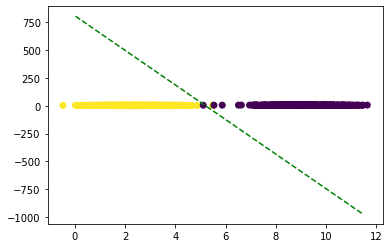

In [70]:
#C越高，说明越不能容忍出现误差
C = 1
kernel='linear'
mysvm2 = MySVM(C=C,kernel=kernel,espilon = 0)
mysvm2.fit(X_train,y_train)
p = mysvm2.predict(X_test)
print("使用自己写的svm：",np.sum(p == y_test)/len(y_test)*100,"%")
print("支持向量的数量：",mysvm2._sv_alpha.shape)
decision_boundary(kernel,mysvm2)

使用自己写的svm： 100.0 %
支持向量的数量： (10,)


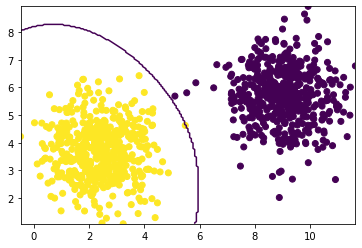

In [35]:
C = 2
kernel='rbf'
gamma = 0.05
mysvm3 = MySVM(C=C,max_epoch=10000,kernel=kernel,gamma = gamma)
mysvm3.fit(X_train,y_train)
p = mysvm3.predict(X_test)
print("使用自己写的svm：",np.sum(p == y_test)/len(y_test)*100,"%")
print("支持向量的数量：",mysvm3._sv_alpha.shape)
decision_boundary(kernel,mysvm3)

使用sklearn的svm： 100.0 %


G:\python\Lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


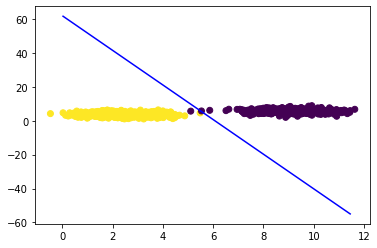

In [34]:
from sklearn.svm import LinearSVC

svc = LinearSVC()
svc.fit(X_train,y_train)
yyy = svc.predict(X_test)
print("使用sklearn的svm：",np.sum(yyy == y_test)/len(y_test)*100,"%")
w = svc.coef_
b = svc.intercept_
# print(w,b)
xp = np.linspace(np.min(X_train[:, 0]), np.max(X_train[:, 0]), 100)
yp = -(w[0, 0] * xp + b) / w[0, 1]
plt.plot(xp, yp, 'b-')

# #plt.subplot(1,2,1)
plt.scatter(x_samples[:,0],x_samples[:,1],c=y_true)
#plt.subplot()
plt.show()

使用sklearn的svm： 100.0 %


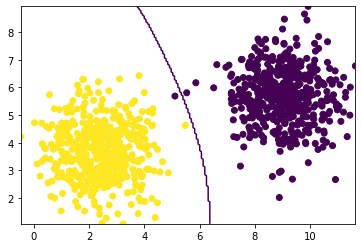

In [33]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf')
svc.fit(X_train,y_train)
yyy = svc.predict(X_test)
print("使用sklearn的svm：",np.sum(yyy == y_test)/len(y_test)*100,"%")

x_1 = np.transpose(np.linspace(np.min(x_samples[:, 0]), np.max(x_samples[:, 0]), 200).reshape(1, -1))
x_2 = np.transpose(np.linspace(np.min(x_samples[:, 1]), np.max(x_samples[:, 1]), 200).reshape(1, -1))
X1, X2 = np.meshgrid(x_1, x_2)
vals = np.zeros(X1.shape)
for i in range(X1.shape[1]):
    this_X = np.hstack((X1[:, i].reshape(-1, 1), X2[:, i].reshape(-1, 1)))
    vals[:,i] = svc.predict(this_X)

plt.contour(X1, X2, vals, [0, 1])
plt.scatter(x_samples[:,0],x_samples[:,1],c=y_true)
#plt.subplot()
plt.show()